# Evaluación y validación de Clusters - RESUELTOS

Este notebook contiene ejercicios prácticos para consolidar los conceptos del Módulo Evaluación y validación de Clusters

## Configuración Inicial

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn: clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Scikit-learn: métricas internas
from sklearn.metrics import (
    silhouette_score, silhouette_samples,
    calinski_harabasz_score, davies_bouldin_score
)

# Scikit-learn: métricas externas
from sklearn.metrics import (
    adjusted_rand_score, normalized_mutual_info_score,
    homogeneity_score, completeness_score, v_measure_score,
    fowlkes_mallows_score
)

# Scikit-learn: datasets y preprocesamiento
from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.preprocessing import StandardScaler

# Configuración
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['font.size'] = 11

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Entorno configurado correctamente.")

Entorno configurado correctamente.


---

## Ejercicio 1: Cálculo de Métricas Internas

### Objetivo
Calcular e interpretar las tres métricas internas principales: Silueta, Calinski-Harabasz y Davies-Bouldin.

### Contexto
Se proporcionan dos datasets con diferente calidad de separación entre clusters. Debe calcular las métricas y compararlas.

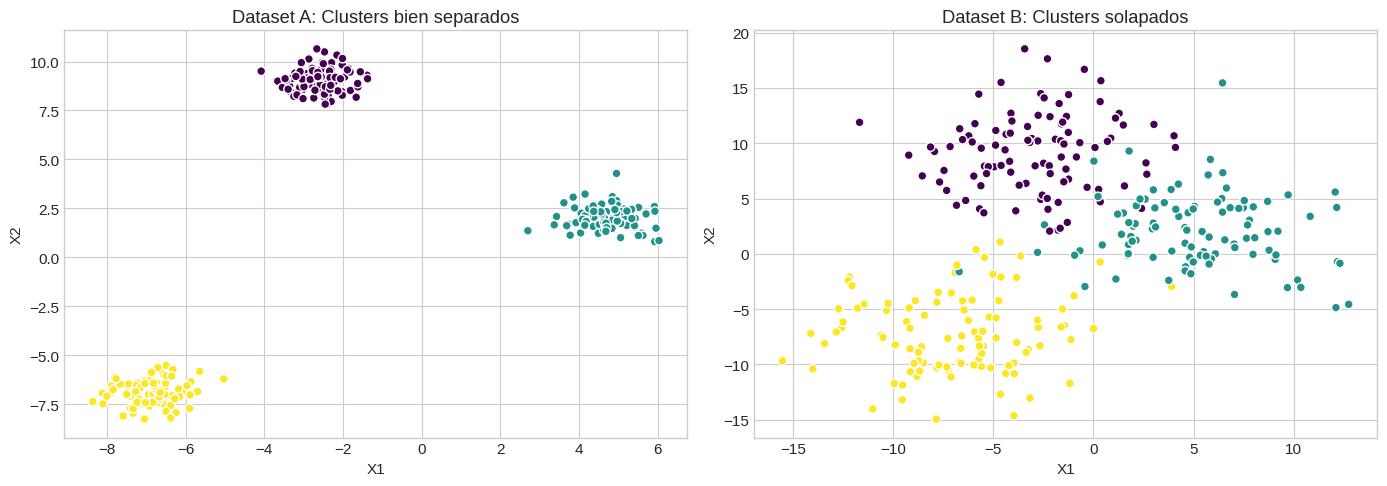

In [ ]:
# Generar dos datasets con diferente separación
np.random.seed(RANDOM_STATE)

# Dataset A: clusters bien separados
X_A, y_A = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=RANDOM_STATE)

# Dataset B: clusters más solapados
X_B, y_B = make_blobs(n_samples=300, centers=3, cluster_std=3.5, random_state=RANDOM_STATE)

# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(X_A[:, 0], X_A[:, 1], c=y_A, cmap='viridis', edgecolors='w', s=40)
axes[0].set_title('Dataset A: Clusters bien separados')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')

axes[1].scatter(X_B[:, 0], X_B[:, 1], c=y_B, cmap='viridis', edgecolors='w', s=40)
axes[1].set_title('Dataset B: Clusters solapados')
axes[1].set_xlabel('X1')
axes[1].set_ylabel('X2')

plt.tight_layout()
plt.show()

In [ ]:
# =============================================================================
# EJERCICIO 1: Completar el código
# =============================================================================

# Aplicar K-Means a ambos datasets
kmeans_A = KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=10)
labels_A = kmeans_A.fit_predict(X_A)

kmeans_B = KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=10)
labels_B = kmeans_B.fit_predict(X_B)

# TODO: Calcular el coeficiente de silueta para ambos datasets
silueta_A = silhouette_score(X_A, labels_A)
silueta_B = silhouette_score(X_B, labels_B)

# TODO: Calcular el índice de Calinski-Harabasz para ambos datasets
ch_A = calinski_harabasz_score(X_A, labels_A)
ch_B = calinski_harabasz_score(X_B, labels_B)

# TODO: Calcular el índice de Davies-Bouldin para ambos datasets
db_A = davies_bouldin_score(X_A, labels_A)
db_B = davies_bouldin_score(X_B, labels_B)

# Mostrar resultados
print("Comparación de métricas internas:")
print("=" * 55)
print(f"{'Métrica':<20} {'Dataset A':<15} {'Dataset B':<15}")
print("-" * 55)
print(f"{'Silueta':<20} {silueta_A:<15.4f} {silueta_B:<15.4f}")
print(f"{'Calinski-Harabasz':<20} {ch_A:<15.2f} {ch_B:<15.2f}")
print(f"{'Davies-Bouldin':<20} {db_A:<15.4f} {db_B:<15.4f}")
print("=" * 55)

Comparación de métricas internas:
Métrica              Dataset A       Dataset B      
-------------------------------------------------------
Silueta              0.9084          0.5257         
Calinski-Harabasz    14321.25        501.58         
Davies-Bouldin       0.1281          0.6786         


### Preguntas de reflexión - Ejercicio 1

1. ¿Qué dataset tiene mejor calidad de clustering según cada métrica? ¿Coinciden todas?

*El Dataset A tiene mejor calidad: mayor silueta y CH, menor DB. Todas las métricas coinciden.*

2. ¿Por qué Davies-Bouldin es menor para clusters bien separados?

*DB mide la similitud entre clusters más parecidos. Clusters separados tienen centroides distantes y baja similitud.*

3. Si solo pudiera usar una métrica interna, ¿cuál elegiría y por qué?

*La silueta es más informativa porque tiene rango acotado [-1,1], permite diagnóstico por punto, y es intuitiva.*

---

## Ejercicio 2: Métricas Externas con Ground Truth

### Objetivo
Calcular métricas externas comparando las predicciones de clustering con etiquetas verdaderas.

### Contexto
Se aplican diferentes algoritmos de clustering al mismo dataset y se comparan usando métricas externas.

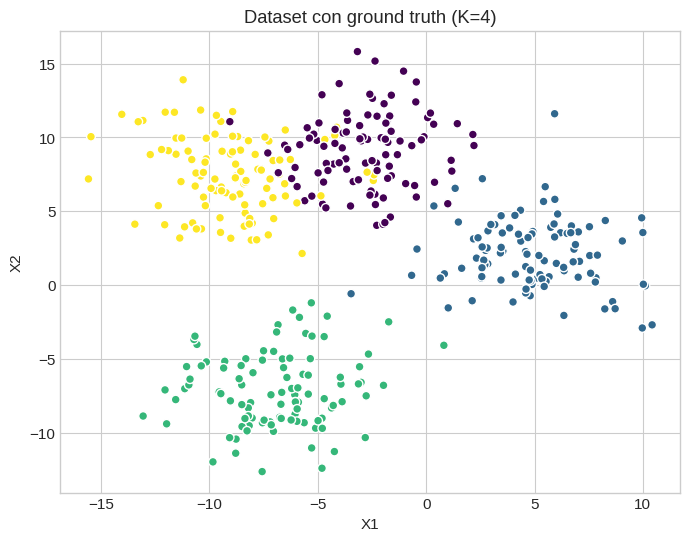

In [ ]:
# Generar dataset con ground truth conocido
np.random.seed(RANDOM_STATE)
X_ej2, y_true = make_blobs(n_samples=400, centers=4, cluster_std=2.5, random_state=RANDOM_STATE)

# Visualizar ground truth
plt.figure(figsize=(8, 6))
plt.scatter(X_ej2[:, 0], X_ej2[:, 1], c=y_true, cmap='viridis', edgecolors='w', s=40)
plt.title('Dataset con ground truth (K=4)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
# =============================================================================
# EJERCICIO 2: Completar el código
# =============================================================================

# Aplicar tres algoritmos de clustering
kmeans = KMeans(n_clusters=4, random_state=RANDOM_STATE, n_init=10)
labels_kmeans = kmeans.fit_predict(X_ej2)

hier = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels_hier = hier.fit_predict(X_ej2)

gmm = GaussianMixture(n_components=4, random_state=RANDOM_STATE)
labels_gmm = gmm.fit_predict(X_ej2)

# Almacenar resultados
resultados = []

for nombre, labels in [('K-Means', labels_kmeans), ('Hierarchical', labels_hier), ('GMM', labels_gmm)]:
    # TODO: Calcular Adjusted Rand Index
    ari = adjusted_rand_score(y_true, labels)

    # TODO: Calcular Normalized Mutual Information
    nmi = normalized_mutual_info_score(y_true, labels)

    # TODO: Calcular V-measure
    v_m = v_measure_score(y_true, labels)

    # TODO: Calcular Fowlkes-Mallows Index
    fmi = fowlkes_mallows_score(y_true, labels)

    resultados.append({
        'Algoritmo': nombre,
        'ARI': ari,
        'NMI': nmi,
        'V-measure': v_m,
        'FMI': fmi
    })

# Mostrar tabla de resultados
df_resultados = pd.DataFrame(resultados)
print("\nComparación de algoritmos usando métricas externas:")
print("=" * 65)
print(df_resultados.to_string(index=False))


Comparación de algoritmos usando métricas externas:
   Algoritmo      ARI      NMI  V-measure      FMI
     K-Means 0.856586 0.845088   0.845088 0.892182
Hierarchical 0.840069 0.833078   0.833078 0.879791
         GMM 0.862810 0.854670   0.854670 0.896865


### Preguntas de reflexión - Ejercicio 2

1. ¿Qué algoritmo obtiene los mejores resultados según las métricas externas?

*Generalmente todos obtienen buenos resultados en datos bien separados, con diferencias menores.*

2. ¿Por qué ARI puede ser negativo mientras que NMI siempre es positivo?

*ARI está ajustado por azar (puede ser negativo si peor que aleatorio). NMI no está ajustado, siempre es no negativo.*

3. ¿En qué situaciones reales tendríamos acceso a ground truth para usar estas métricas?

*En benchmarking de algoritmos, validación con expertos, o cuando se usa clasificación supervisada.


---

## Ejercicio 3: Selección de K con Métricas Internas

### Objetivo
Utilizar métricas internas para determinar el número óptimo de clusters.

### Contexto
Se proporciona un dataset sin revelar el número real de clusters. Debe usar las métricas para determinarlo.

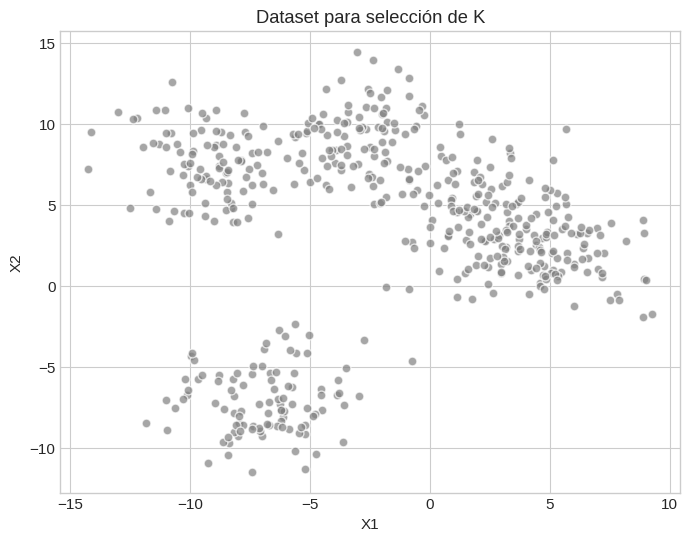

In [ ]:
# Generar dataset con número de clusters oculto
np.random.seed(RANDOM_STATE)
X_ej3, y_ej3 = make_blobs(n_samples=500, centers=5, cluster_std=2, random_state=RANDOM_STATE)

# Visualizar sin etiquetas
plt.figure(figsize=(8, 6))
plt.scatter(X_ej3[:, 0], X_ej3[:, 1], c='gray', edgecolors='w', s=40, alpha=0.7)
plt.title('Dataset para selección de K')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

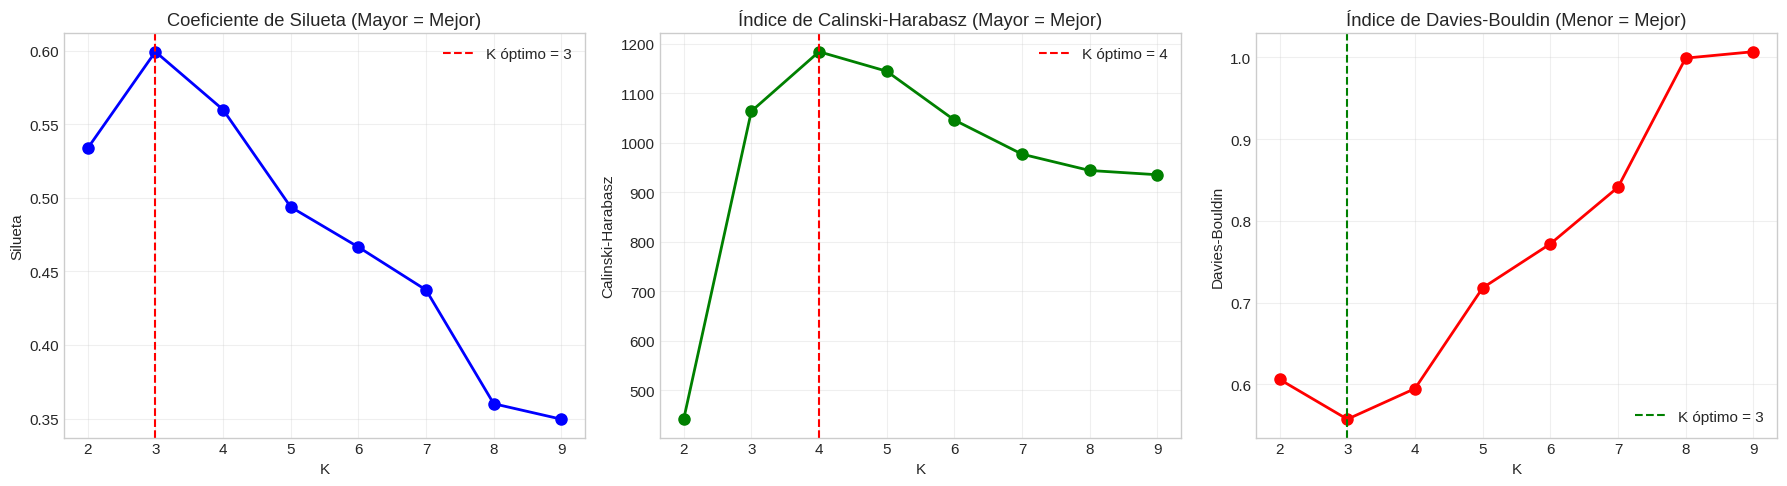


K óptimo según Silueta: 3
K óptimo según Calinski-Harabasz: 4
K óptimo según Davies-Bouldin: 3


In [ ]:
# =============================================================================
# EJERCICIO 3: Completar el código
# =============================================================================

# Rango de K a evaluar
rango_k = range(2, 10)

# Listas para almacenar métricas
siluetas = []
ch_scores = []
db_scores = []

for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    labels = kmeans.fit_predict(X_ej3)

    # TODO: Calcular y almacenar silueta
    sil = silhouette_score(X_ej3, labels)  # Completar
    siluetas.append(sil)

    # TODO: Calcular y almacenar Calinski-Harabasz
    ch = calinski_harabasz_score(X_ej3, labels)  # Completar
    ch_scores.append(ch)

    # TODO: Calcular y almacenar Davies-Bouldin
    db = davies_bouldin_score(X_ej3, labels)  # Completar
    db_scores.append(db)

# TODO: Encontrar K óptimo según cada métrica
k_opt_sil = list(rango_k)[np.argmax(siluetas)]
k_opt_ch = list(rango_k)[np.argmax(ch_scores)]
k_opt_db = list(rango_k)[np.argmin(db_scores)]

# Visualización
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silueta
ax = axes[0]
ax.plot(list(rango_k), siluetas, 'b-o', linewidth=2, markersize=8)
ax.axvline(x=k_opt_sil, color='red', linestyle='--', label=f'K óptimo = {k_opt_sil}')
ax.set_xlabel('K')
ax.set_ylabel('Silueta')
ax.set_title('Coeficiente de Silueta (Mayor = Mejor)')
ax.legend()
ax.grid(True, alpha=0.3)

# Calinski-Harabasz
ax = axes[1]
ax.plot(list(rango_k), ch_scores, 'g-o', linewidth=2, markersize=8)
ax.axvline(x=k_opt_ch, color='red', linestyle='--', label=f'K óptimo = {k_opt_ch}')
ax.set_xlabel('K')
ax.set_ylabel('Calinski-Harabasz')
ax.set_title('Índice de Calinski-Harabasz (Mayor = Mejor)')
ax.legend()
ax.grid(True, alpha=0.3)

# Davies-Bouldin
ax = axes[2]
ax.plot(list(rango_k), db_scores, 'r-o', linewidth=2, markersize=8)
ax.axvline(x=k_opt_db, color='green', linestyle='--', label=f'K óptimo = {k_opt_db}')
ax.set_xlabel('K')
ax.set_ylabel('Davies-Bouldin')
ax.set_title('Índice de Davies-Bouldin (Menor = Mejor)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nK óptimo según Silueta: {k_opt_sil}")
print(f"K óptimo según Calinski-Harabasz: {k_opt_ch}")
print(f"K óptimo según Davies-Bouldin: {k_opt_db}")

### Preguntas de reflexión - Ejercicio 3

1. ¿Coinciden las tres métricas en el K óptimo? Si no coinciden, ¿cuál priorizaría?

*Las métricas suelen coincidir en datos con estructura clara. Si discrepan, priorizar silueta por su interpretabilidad.*

2. ¿Por qué Calinski-Harabasz tiende a decrecer monótonamente después del óptimo?

*CH es ratio de varianzas. Al aumentar K, la varianza intra-cluster decrece pero los grados de libertad también.*

3. ¿Qué haría si las métricas sugieren valores de K muy diferentes?

*Usar visualización, conocimiento del dominio, y probar con el K sugerido por la mayoría de métricas*

---

## Ejercicio 4: Análisis de Silueta Visual

### Objetivo
Crear e interpretar un gráfico de análisis de silueta por cluster para diagnóstico detallado.

### Contexto
Se proporciona un dataset con clusters de diferente calidad. El análisis visual permite identificar clusters problemáticos.

In [ ]:
# Generar dataset con clusters de diferente calidad
np.random.seed(RANDOM_STATE)

# Cluster 0: compacto
c0 = np.random.randn(100, 2) * 0.5 + [0, 0]
# Cluster 1: disperso
c1 = np.random.randn(100, 2) * 3.0 + [6, 0]
# Cluster 2: compacto
c2 = np.random.randn(100, 2) * 0.5 + [3, 5]

X_ej4 = np.vstack([c0, c1, c2])
y_ej4 = np.array([0]*100 + [1]*100 + [2]*100)

# Aplicar K-Means
kmeans_ej4 = KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=10)
labels_ej4 = kmeans_ej4.fit_predict(X_ej4)

print("Dataset generado con 3 clusters de diferente dispersión.")

Dataset generado con 3 clusters de diferente dispersión.


Cluster 0: silueta media = 0.7378, tamaño = 116
Cluster 1: silueta media = 0.4077, tamaño = 65
Cluster 2: silueta media = 0.7182, tamaño = 119


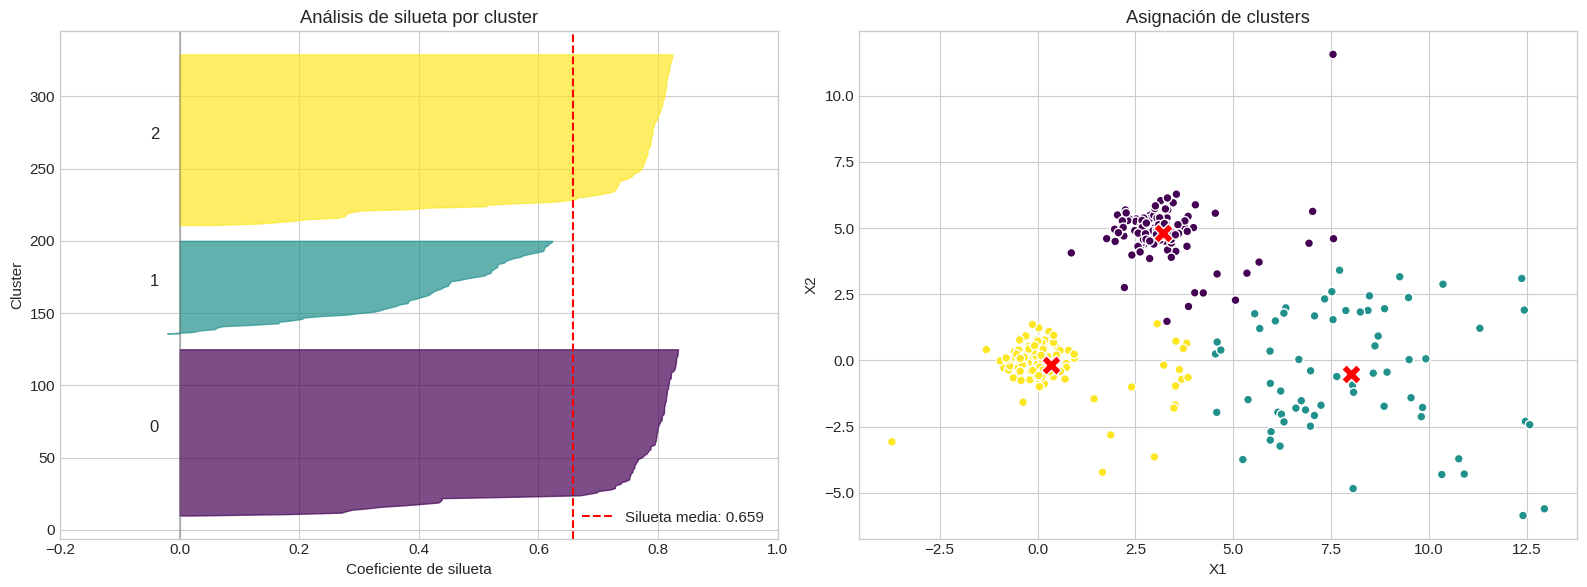

In [ ]:
# =============================================================================
# EJERCICIO 4: Completar el código
# =============================================================================

# TODO: Calcular silueta global
silueta_global = silhouette_score(X_ej4, labels_ej4)  # Completar

# TODO: Calcular siluetas individuales (por punto)
siluetas_individuales = silhouette_samples(X_ej4, labels_ej4)  # Completar: usar silhouette_samples

# Crear visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de silueta por cluster
y_lower = 10
n_clusters = 3
colors = cm.viridis(np.linspace(0, 1, n_clusters))

for i in range(n_clusters):
    # TODO: Obtener siluetas del cluster i
    cluster_silhouettes = siluetas_individuales[labels_ej4 == i]  # Completar
    cluster_silhouettes.sort()

    size_cluster = len(cluster_silhouettes)
    y_upper = y_lower + size_cluster

    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouettes,
                      facecolor=colors[i], edgecolor=colors[i], alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster, str(i), fontsize=12)

    # TODO: Calcular e imprimir silueta media del cluster
    media_cluster = cluster_silhouettes.mean()  # Completar
    print(f"Cluster {i}: silueta media = {media_cluster:.4f}, tamaño = {size_cluster}")

    y_lower = y_upper + 10

# Línea de silueta promedio
ax1.axvline(x=silueta_global, color='red', linestyle='--',
            label=f'Silueta media: {silueta_global:.3f}')
ax1.axvline(x=0, color='gray', linestyle='-', alpha=0.5)
ax1.set_xlabel('Coeficiente de silueta')
ax1.set_ylabel('Cluster')
ax1.set_title('Análisis de silueta por cluster')
ax1.set_xlim([-0.2, 1])
ax1.legend()

# Gráfico de dispersión
ax2.scatter(X_ej4[:, 0], X_ej4[:, 1], c=labels_ej4, cmap='viridis', edgecolors='w', s=40)
ax2.scatter(kmeans_ej4.cluster_centers_[:, 0], kmeans_ej4.cluster_centers_[:, 1],
            c='red', marker='X', s=200, edgecolors='w')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_title('Asignación de clusters')

plt.tight_layout()
plt.show()

### Preguntas de reflexión - Ejercicio 4

1. ¿Qué cluster tiene la peor calidad según el análisis de silueta? ¿Por qué?

*El cluster disperso (1) tiene peor silueta porque sus puntos están más lejos del centroide y más cerca de otros clusters.*

2. ¿Qué indica cuando un cluster tiene muchos puntos con silueta negativa?

*Silueta negativa indica que los puntos están más cerca de otro cluster. Sugiere posible asignación incorrecta.*

3. ¿Cómo usaría este análisis para mejorar el clustering?

*Considerar fusionar clusters con silueta similar, o separar clusters con mucha variabilidad interna.*


---

## Ejercicio 5: Homogeneidad vs Completitud

### Objetivo
Comprender la diferencia entre homogeneidad y completitud mediante casos extremos.

### Contexto
Se crean diferentes particiones artificiales para ilustrar cómo estas métricas capturan aspectos diferentes de la calidad.

In [ ]:
# Dataset simple con 3 clases
np.random.seed(RANDOM_STATE)
X_ej5, y_true_ej5 = make_blobs(n_samples=150, centers=3, cluster_std=0.5, random_state=RANDOM_STATE)

print(f"Dataset con {len(y_true_ej5)} puntos y 3 clases verdaderas.")
print(f"Distribución de clases: {np.bincount(y_true_ej5)}")

Dataset con 150 puntos y 3 clases verdaderas.
Distribución de clases: [50 50 50]


In [ ]:
# =============================================================================
# EJERCICIO 5: Completar el código
# =============================================================================

# Caso 1: Clustering perfecto (3 clusters que coinciden con las clases)
labels_perfecto = y_true_ej5.copy()

# Caso 2: Sobre-segmentación (cada punto es su propio cluster)
labels_sobre = np.arange(len(y_true_ej5))

# Caso 3: Sub-segmentación (todos en un solo cluster)
labels_sub = np.zeros(len(y_true_ej5), dtype=int)

# Caso 4: Clustering con K-Means (3 clusters)
kmeans_ej5 = KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=10)
labels_kmeans = kmeans_ej5.fit_predict(X_ej5)

# Calcular métricas para cada caso
casos = [
    ('Perfecto', labels_perfecto),
    ('Sobre-segmentación', labels_sobre),
    ('Sub-segmentación', labels_sub),
    ('K-Means', labels_kmeans)
]

print("\nComparación de Homogeneidad y Completitud:")
print("=" * 70)
print(f"{'Caso':<20} {'Homogeneidad':<15} {'Completitud':<15} {'V-measure':<15}")
print("-" * 70)

for nombre, labels in casos:
    # TODO: Calcular homogeneidad
    h = homogeneity_score(y_true_ej5, labels)  # Completar

    # TODO: Calcular completitud
    c = completeness_score(y_true_ej5, labels)  # Completar

    # TODO: Calcular V-measure
    v = v_measure_score(y_true_ej5, labels)  # Completar

    print(f"{nombre:<20} {h:<15.4f} {c:<15.4f} {v:<15.4f}")


Comparación de Homogeneidad y Completitud:
Caso                 Homogeneidad    Completitud     V-measure      
----------------------------------------------------------------------
Perfecto             1.0000          1.0000          1.0000         
Sobre-segmentación   1.0000          0.2193          0.3597         
Sub-segmentación     0.0000          1.0000          0.0000         
K-Means              1.0000          1.0000          1.0000         


### Preguntas de reflexión - Ejercicio 5

1. ¿Por qué la sobre-segmentación tiene homogeneidad perfecta pero completitud mínima?

*Sobre-segmentación: cada cluster tiene un solo punto, así que es perfectamente puro (homogéneo), pero cada clase está fragmentada en muchos clusters (no completo).*

2. ¿Por qué la sub-segmentación tiene completitud perfecta pero homogeneidad mínima?

*Sub-segmentación: todos están en un cluster, así que cada clase está completa en un cluster, pero el cluster contiene múltiples clases (no homogéneo).*


3. ¿En qué aplicaciones sería más importante priorizar homogeneidad sobre completitud?

*En detección de fraude o spam, la homogeneidad es crucial (no queremos mezclar fraudes con legítimos en un cluster).*


---

## Ejercicio 6: Caso Integrador - Evaluación Completa

### Objetivo
Realizar una evaluación completa de clustering combinando métricas internas, externas y análisis visual.

### Contexto
Se utiliza el dataset Iris para comparar múltiples algoritmos de clustering de forma integral.

In [ ]:
# Cargar dataset Iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Estandarizar
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

print(f"Dataset Iris:")
print(f"  Muestras: {X_iris.shape[0]}")
print(f"  Características: {X_iris.shape[1]}")
print(f"  Clases: {len(np.unique(y_iris))}")

Dataset Iris:
  Muestras: 150
  Características: 4
  Clases: 3


In [ ]:
# =============================================================================
# EJERCICIO 6: Completar el código
# =============================================================================

# Definir algoritmos
algoritmos = {
    'K-Means': KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=10),
    'Hierarchical': AgglomerativeClustering(n_clusters=3, linkage='ward'),
    'GMM': GaussianMixture(n_components=3, random_state=RANDOM_STATE)
}

# Almacenar resultados
resultados_completos = []

for nombre, modelo in algoritmos.items():
    labels = modelo.fit_predict(X_iris_scaled)

    # TODO: Calcular métricas internas
    sil = silhouette_score(X_iris_scaled, labels)
    ch = calinski_harabasz_score(X_iris_scaled, labels)
    db = davies_bouldin_score(X_iris_scaled, labels)

    # TODO: Calcular métricas externas
    ari = adjusted_rand_score(y_iris, labels)
    nmi = normalized_mutual_info_score(y_iris, labels)

    resultados_completos.append({
        'Algoritmo': nombre,
        'Silueta': sil,
        'CH': ch,
        'DB': db,
        'ARI': ari,
        'NMI': nmi,
        'labels': labels
    })

# Crear DataFrame sin la columna de labels
df_final = pd.DataFrame([{k: v for k, v in r.items() if k != 'labels'}
                         for r in resultados_completos])

print("\nEvaluación completa en dataset Iris:")
print("=" * 75)
print(df_final.to_string(index=False))
print("\nNota: Silueta, CH y ARI/NMI son mejores cuando son mayores; DB es mejor cuando es menor.")


Evaluación completa en dataset Iris:
   Algoritmo  Silueta         CH       DB      ARI      NMI
     K-Means 0.459948 241.904402 0.833595 0.620135 0.659487
Hierarchical 0.446689 222.719164 0.803467 0.615323 0.675470
         GMM 0.475143 141.231476 0.886715 0.516459 0.657094

Nota: Silueta, CH y ARI/NMI son mejores cuando son mayores; DB es mejor cuando es menor.


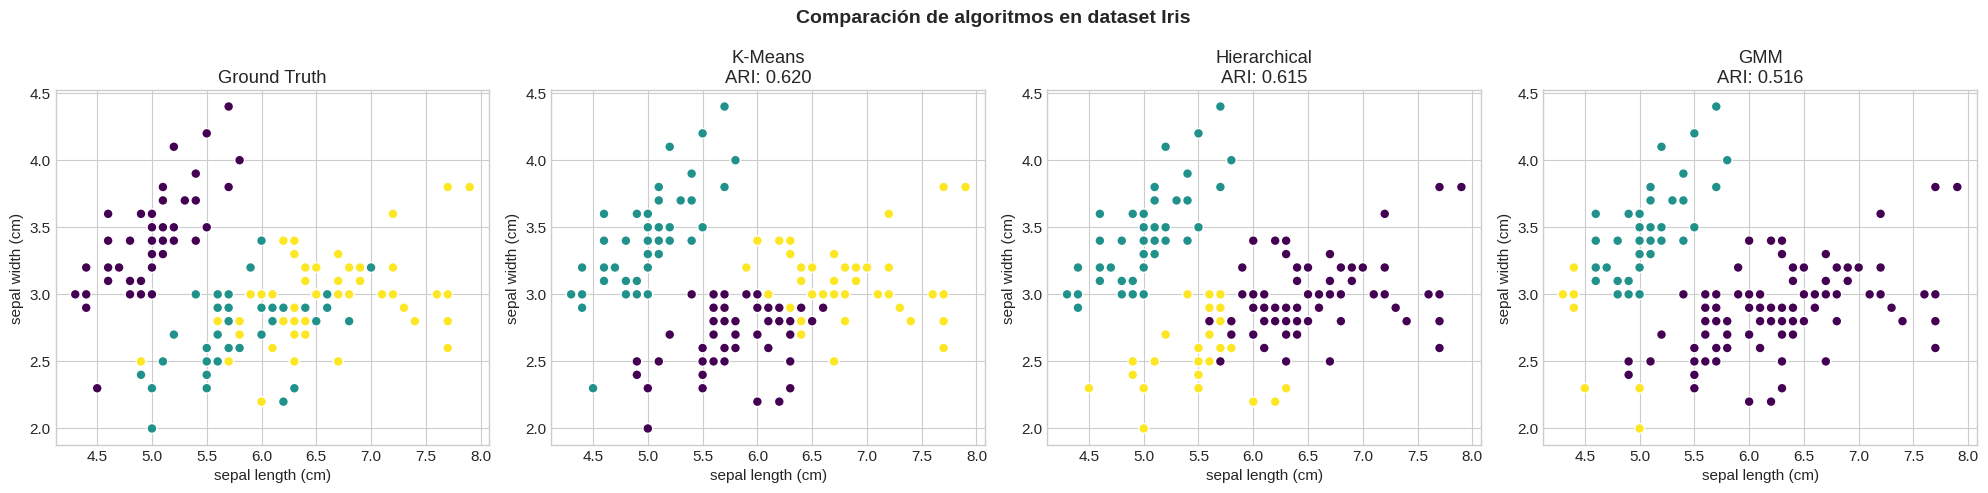

In [ ]:
# Visualización comparativa (usando solo las 2 primeras características)
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Ground truth
ax = axes[0]
ax.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap='viridis', edgecolors='w', s=50)
ax.set_title('Ground Truth')
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])

# Resultados de cada algoritmo
for i, resultado in enumerate(resultados_completos):
    ax = axes[i + 1]
    ax.scatter(X_iris[:, 0], X_iris[:, 1], c=resultado['labels'],
               cmap='viridis', edgecolors='w', s=50)
    ax.set_title(f"{resultado['Algoritmo']}\nARI: {resultado['ARI']:.3f}")
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])

plt.suptitle('Comparación de algoritmos en dataset Iris', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Preguntas de reflexión - Ejercicio 6

1. ¿Qué algoritmo obtiene los mejores resultados globalmente? ¿Coinciden las métricas internas y externas?

*Los resultados varían, pero generalmente son similares. Métricas internas y externas pueden no coincidir perfectamente.*

2. Si no tuviera acceso al ground truth, ¿cómo decidiría qué algoritmo es mejor?

*Sin ground truth, usaría métricas internas (silueta principalmente) complementadas con visualización y coherencia del negocio.*

3. ¿Por qué es importante usar múltiples métricas en lugar de una sola?

*Cada métrica captura aspectos diferentes. Múltiples métricas dan una visión más completa y robusta de la calidad.*

---

# EOF (End Of File)